In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc
from cProfile import label
from scipy.integrate import quad, trapezoid
import scipy.interpolate as scint
from mpl_toolkits.axisartist.axislines import SubplotZero
from sympy import solve, Poly, Eq, Function, exp, symbols
from sklearn.linear_model import LinearRegression
from matplotlib.patches import Arc
from matplotlib.transforms import IdentityTransform, TransformedBbox, Bbox
from typing import Sequence
import sys
sys.path.append('./')
from functions import AngleAnnotation

Figure 3.1: Position of the relative velocity vectors before and after a collision

In [2]:
x = np.arange(-3, 7, 0.5)
y = np.zeros(20)

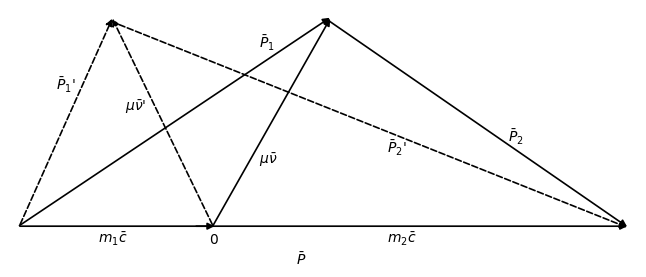

In [54]:
fig, ax = plt.subplots(1,1, figsize = (8,3))

ax.plot(x, y, color = 'k', lw = 0.1)
ax.annotate(' ', xy = (0.21,0), xytext = (-3.2,0), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'facecolor':'k'}), 
            va = 'center')
ax.annotate(' ', xy = (7,0), xytext = (-0.3,0), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'facecolor':'k'}), 
            va = 'center')
ax.text(0.075, -0.008, '0')
ax.text(-1.75, -0.008, r'$m_{1}\bar{c}$')
ax.text(3, -0.008, r'$m_{2}\bar{c}$')
ax.text(1.5, -0.018, r'$\bar{P}$')

ax.annotate(' ', xy = (2.1,0.1), xytext = (-3.2,-0.002), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'facecolor':'k'}), 
            va = 'center')
ax.annotate(' ', xy = (2.09,0.1), xytext = (0,-0.005), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'facecolor':'k'}), 
            va = 'center')
ax.annotate(' ', xy = (6.99,-0.001), xytext = (1.9,0.1), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'facecolor':'k'}), 
            va = 'center')
ax.text(0.9, 0.085, r'$\bar{P}_{1}$')
ax.text(0.9, 0.03, r'$\mu\bar{\nu}$')
ax.text(5, 0.04, r'$\bar{P}_{2}$')

ax.annotate(' ', xy = (-1.5,0.1), xytext = (-3.16,-0.005), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'ls': '--', 
            'facecolor':'k'}), va = 'center')
ax.annotate(' ', xy = (-1.535,0.1), xytext = (0.19,-0.005), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'ls': '--', 
            'facecolor':'k'}), va = 'center')
ax.annotate(' ', xy = (6.99,-0.001), xytext = (-1.7,0.099), arrowprops=({'arrowstyle': '-|>', 'lw': 1.2, 'ls': '--', 
            'facecolor':'k'}), va = 'center')
ax.text(-2.45, 0.065, r'''$\bar{P}_{1}$' ''')
ax.text(-1.3, 0.055, r'''$\mu\bar{\nu}$' ''')
ax.text(3, 0.035, r'''$\bar{P}_{2}$' ''')

plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True)

ax.set_xlim(-3.1, 7.1)
ax.set_ylim(-0.01, 0.1)

plt.savefig('velocity_vectors.png', dpi = 150)
plt.show()

Figure 3.2: Scattering of particle 1 with respect to particle 2 in the impact parameter picture

In [2]:
# Linear
x_baseline = np.linspace(0, 10, 21)
y_baseline = np.zeros(21)

x_b = np.zeros(21)+2 
y_b = np.linspace(0, 2, 21)

x_Rt = np.linspace(2, 8, 21)
y_Rt = np.linspace(2, 0, 21)

x_dot_top = np.linspace(3.5, 8.1, 21)
y_dot_top = y_baseline+2

x_dot_bottom = np.linspace(8, 10, 21)
y_dot_bottom = y_b

x_dot_end = np.linspace(8.69, 9, 21)
y_dot_end = np.linspace(2.25, 2.6, 21)

In [3]:
# Vectors
## Vector origin location
x_vec_start = 2
y_vec_start = 2
x_vec_end = 9
y_vec_end = 2.6

## Directional vector
u_vec_start = 1.5
v_vec_start = 0
u_vec_end = 0.9
v_vec_end = 1.3

In [4]:
# Exponential
x_exp = np.linspace(0, 2, 42)
y_exp = np.exp(0.43*x_exp)
y_test = x_exp**2.59

In [6]:
# Angles
center1 = (2, 0)
center2 = (8, 0)

baseline = [(2, 0), (8, 0), (10, 0)]
p1 = (2, 2)
p2 = (10, 2)

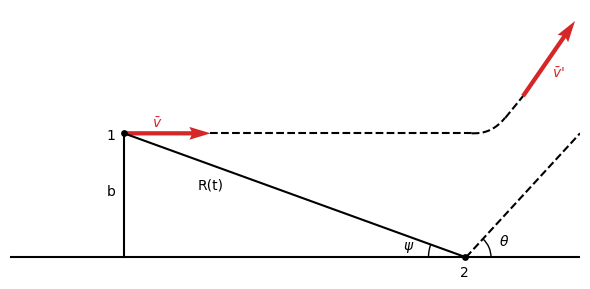

In [30]:
fig, ax = plt.subplots(1,1, figsize = (6,3))

# Linear
ax.plot(x_baseline, y_baseline, color = 'k')
ax.plot(x_b, y_b, color = 'k', zorder = 10)
ax.text(1.7, 1, 'b')
ax.plot(x_Rt, y_Rt, color = 'k')
ax. text(3.3, 1.1, 'R(t)')
ax.plot(x_dot_top, y_dot_top, color = 'k', ls = '--')
ax.plot(x_dot_bottom, y_dot_bottom, color = 'k', ls = '--')
ax.plot(x_dot_end, y_dot_end, color = 'k', ls = '--')

# Vectors
ax.quiver(x_vec_start, y_vec_start, u_vec_start, v_vec_start, color='tab:red', units='xy', scale=1)
ax.text(2.5, 2.1, r'$\bar{v}$', color = 'tab:red')
ax.quiver(x_vec_end, y_vec_end, u_vec_end, v_vec_end, color='tab:red', units='xy', scale=1)
ax.text(9.5, 2.9, r'''$\bar{v}$' ''', color = 'tab:red')

# Exponential
below = x_exp < 0.63414634
sns.lineplot(x = x_exp[below]+8.1, y = y_test[below]+2, color = 'k', ls = '--')

# Points
ax.scatter(2, 2, color = 'k', s = 15)
ax.text(1.7, 1.9, '1')
ax.scatter(7.98, 0, color = 'k', s = 15)
ax.text(7.9, -0.3, '2')

# Angles
# am1 = AngleAnnotation(center1, baseline[1], p1, ax = ax, size = 40, text = None)
am2 = AngleAnnotation(center2, p1, baseline[0], ax = ax, size = 75, text = r'$\psi$', textposition = 'outside')
am3 = AngleAnnotation(center2, baseline[2], p2, ax = ax, size = 50, text = r'$\theta$', textposition = 'outside')

plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True)

ax.set_xlim(0, 10)
ax.set_ylim(-0.35, 4)

plt.tight_layout()
plt.savefig('scatter.png', dpi = 150)
plt.show()

Figure 3.3: The relative motion is divided into motion along the center of mass distance and orbital motion
perpendicular to the center of mass motion

In [17]:
x_baseline_fig3 = np.linspace(0, 10, 21)
y_baseline_fig3 = np.zeros(21)

x_b_fig3 = y_baseline_fig3+2.5
y_b_fig3 = np.linspace(4, 0, 21)

x_R_fig3 = np.array(np.linspace(2.5, 7.5, 21))
y_R_fig3 = np.array(y_b_fig3)

x_R2_fig3 = np.linspace(3.17, 7.5, 21)
y_R2_fig3 = np.linspace(4.67, 0, 21)

x_vt_fig3 = np.linspace(2.5, 4, 21)
y_vt_fig3 = y_baseline_fig3+4

x_Rpsi_fig3 = np.linspace(2.5, 3.17, 21)
y_Rpsi_fig3 = np.linspace(4, 4.67, 21)

x_con_fig3 = np.array(np.linspace(3.33, 4, 21))
y_con_fig3 = x_con_fig3

x_btop_fig3 = np.linspace(3.17, 4, 21)
y_btop_fig3 = np.linspace(4.67, 4, 21)

In [14]:
4-3.33
2.5+0.67

3.17

In [3]:
reg_R = LinearRegression().fit(x_R_fig3.reshape(-1,1), y_R_fig3)
print(reg_R.coef_)
print(reg_R.intercept_)

reg_con = LinearRegression().fit(x_con_fig3.reshape(-1,1), y_con_fig3)
print(reg_con.coef_)
print(reg_con.intercept_)

[-0.8]
6.0
[1.]
-1.7763568394002505e-15


In [6]:
def find_intercept(c1, c2, m1, m2):
    x_intercept = (c2-c1)/(m1-m2)
    y_intercept = m1*x_intercept+c1
    return x_intercept, y_intercept

In [7]:
m_R, c_R = -0.8, 6.0        # y = -0.8x + 6.0
m_con, c_con = 1.0, 0.0     # y = x

x_inter, y_inter = find_intercept(c_R, c_con, m_R, m_con)
print(x_inter)

3.333333333333333


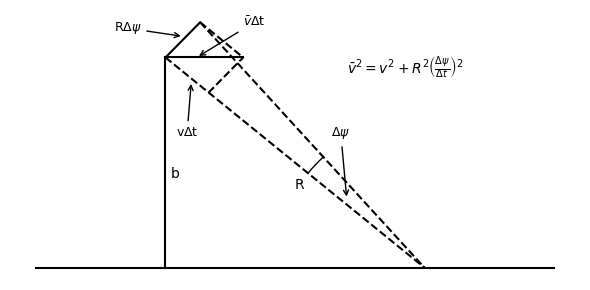

In [89]:
fig, ax = plt.subplots(1,1, figsize = (6,3))

# Linear
ax.plot(x_baseline_fig3, y_baseline_fig3, color = 'k')
ax.plot(x_b_fig3, y_b_fig3, color = 'k')
ax.text(2.6, 1.7, 'b')
ax.plot(x_R_fig3, y_R_fig3, color = 'k', ls = '--')
ax.annotate(r'v$\Delta$t', xy = (3, 3.55), xytext = (2.7, 2.5), 
            arrowprops=({'arrowstyle': '->', 'lw': 1}), fontsize = 9)
ax.text(5, 1.5, 'R')
ax.plot(x_R2_fig3, y_R2_fig3, color = 'k', ls = '--')
ax.plot(x_vt_fig3, y_vt_fig3, color = 'k')
ax.annotate(r'$\bar{v}\Delta$t', xy = (3.1, 4), xytext = (4, 4.6), 
            arrowprops=({'arrowstyle': '->', 'lw': 1}), fontsize = 9)
ax.plot(x_Rpsi_fig3, y_Rpsi_fig3, color = 'k')
ax.annotate(r'R$\Delta\psi$', xy = (2.85, 4.4), xytext = (1.5, 4.5), 
            arrowprops=({'arrowstyle': '->', 'lw': 1}), fontsize = 9)
ax.plot(x_con_fig3, y_con_fig3, color = 'k', ls = '--')
ax.plot(x_btop_fig3, y_btop_fig3, color = 'k', ls = '--')

# Angle
am = AngleAnnotation((x_R_fig3[-1], y_R_fig3[-1]), (x_R2_fig3[0], y_R2_fig3[0]), (x_R_fig3[0], y_R_fig3[0]),
                     ax = ax, size = 300)
ax.annotate(r'$\Delta\psi$', xy = (6, 1.3), xytext = (5.7, 2.5), 
            arrowprops=({'arrowstyle': '->', 'lw': 1}), fontsize = 9)

# Equation
ax.text(6, 3.7, r'$\bar{v}^{2}=v^{2}+R^{2}\left(\frac{\Delta\psi}{\Delta t}\right)^{2}$')

plt.xticks([], [])
plt.yticks([], [])
ax.set_xticks([]) # for major ticks
ax.set_yticks([])
ax.set_xticks([], minor=True) # for minor ticks
ax.set_yticks([], minor=True)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.tight_layout()
plt.savefig('rel_motion.png', dpi = 150)
plt.show()

Figure 3.4: The orbital motion and the interaction potential forms an effective potential

In [182]:
def potentials(D_e, b, R):
    V_morse = D_e*(1-np.exp(-b*(R)))**2
    pot = (D_e/2)*(np.exp(-2*b*R)+2*np.exp(-b*R))
    return V_morse, pot

def orb_motion(D_e, b, R, r_eq, l, mu):
    q = R-r_eq
    V_morse = D_e*(1-np.exp(-b*(q)))**2 -D_e
    L = np.sqrt(l*(l+1)) # *((6.626*10**(-34))/(2*np.pi))
    pot = (L**(2))/(2*mu*R**(2)) - 4.5
    V_eff = V_morse + pot
    return V_morse, pot, V_eff

In [204]:
D_e = 10
R = np.arange(0.1, 2, 0.001)
r_eq = 1
b = 5
l = 1
mu = 0.05

V_morse, anti, V_eff = orb_motion(D_e, b, R, r_eq, l, mu)

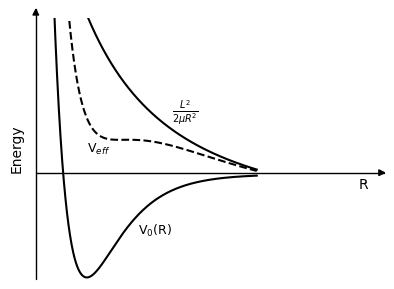

In [242]:
fig = plt.figure(figsize = (4,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)


# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

plt.plot(R-0.7, V_morse-0.15, color = 'k')
ax.text(0.6, -6, r'V$_{0}$(R)', fontsize = 9)
plt.plot(R-0.7, anti-0.2, color = 'k')
ax.text(0.3, 2, r'V$_{eff}$', fontsize = 9)
plt.plot(R-0.7, V_eff-0.2, color = 'k', ls = '--')
ax.text(0.8, 5.5, r'$\frac{L^{2}}{2\mu R^{2}}$')

ax.text(1.9, -1.5, 'R')
ax.set_ylabel('Energy')
plt.xlim(0,2)
plt.ylim(-10.3,15)

plt.tight_layout()
plt.savefig('orb_motion.png', dpi = 150)
plt.show()

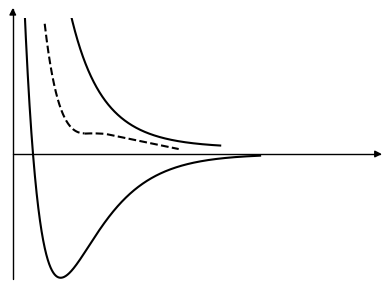

In [54]:
fig = plt.figure(figsize = (4,3))
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")

    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

# removing the axis ticks
plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

# V_0
ax.plot(R+0.6, V_0-3, color = 'k')

# V_eff
ax.plot(R[:500]+0.9, V_eff[:500]+0.5, color = 'k', ls = '--')
ax.plot(R[400:675]+1, -np.log(np.cosh(R[400:675]))+0.5, color = 'k', ls = '--')
ax.plot(R[:900]+1.68, -0.4*R[:900]+0.28, color = 'k', ls = '--', zorder = -10)

# (L**2)/(2*mu*R**2)
ax.plot(R[:2500]+0.6, anti[:2500]+0.15, color = 'k')

ax.set_xlim(0, 4.5)
ax.set_ylim(-1.01*D_e, 1.1*D_e)

plt.tight_layout()
plt.savefig('orb_motion.png', dpi = 150)
plt.show()